In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [2]:
import keras
keras.__version__

'2.2.4'

In [4]:
# 提取部分数据进行训练和测试
# 训练数据
train_images_part = train_images[:50000].reshape((50000, 28*28))
train_images_part = train_images_part.astype('float32') / 255
train_labels_part = train_labels[:50000]
print(train_images_part.shape)
# 验证数据
val_x = train_images[-10000:].reshape((10000, 28*28))
val_x = val_x.astype('float32') / 255
val_y = train_labels[-10000:]
print(val_x.shape)
# 测试数据
test_images_part = test_images[:10000].reshape((10000, 28 * 28))
test_images_part = test_images_part.astype('float32') / 255
test_labels_part = test_labels[:10000]
print(test_labels_part.shape)

(50000, 784)
(10000, 784)
(10000,)


In [5]:
# 处理标签（对标签进行分类编码）
from keras.utils import to_categorical
train_labels_part = to_categorical(train_labels_part)
val_y = to_categorical(val_y)
print(val_y.shape)
test_labels_part = to_categorical(test_labels_part)
test_labels.shape

(10000, 10)


(10000,)

In [19]:
# 构建模型
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_shape=(28*28, )))
# model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation= 'softmax'))

# model = models.Sequential()
# model.add(layers.Dropout(0.2, input_shape=(28*28,)))
# model.add(layers.Dense(512,activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))


In [20]:
model.compile(optimizer=
              optimizers.Adam(lr=0.001, 
              beta_1=0.9, 
              beta_2=0.999, 
              epsilon=None, 
              decay=0.0, 
              amsgrad=False),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 开始训练
batch_size = 128
epochs = 20
history = model.fit(train_images_part, train_labels_part, batch_size = batch_size, epochs=epochs, validation_data=(val_x, val_y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 64us/step - loss: 0.3700 - acc: 0.8921 - val_loss: 0.1658 - val_acc: 0.9557
Epoch 2/10
50000/50000 [==============================] - 3s 50us/step - loss: 0.1671 - acc: 0.9519 - val_loss: 0.1213 - val_acc: 0.9657
Epoch 3/10
50000/50000 [==============================] - 2s 49us/step - loss: 0.1202 - acc: 0.9647 - val_loss: 0.0987 - val_acc: 0.9712
Epoch 4/10
50000/50000 [==============================] - 2s 49us/step - loss: 0.0946 - acc: 0.9722 - val_loss: 0.0849 - val_acc: 0.9743
Epoch 5/10
50000/50000 [==============================] - 2s 49us/step - loss: 0.0770 - acc: 0.9770 - val_loss: 0.0839 - val_acc: 0.9755
Epoch 6/10
50000/50000 [==============================] - 3s 54us/step - loss: 0.0646 - acc: 0.9814 - val_loss: 0.0746 - val_acc: 0.9784
Epoch 7/10
50000/50000 [==============================] - 3s 65us/step - loss: 0.0560 - acc: 0.9837 - val_loss: 0.0752 - val_acc

In [22]:
test_loss, test_acc = model.evaluate(test_images_part, test_labels_part)
print('test_loss:{}, test_acc:{}'.format(test_loss, test_acc))

10000/10000 [==============================] - 1s 74us/step
test_loss:0.06520638863877393, test_acc:0.9799


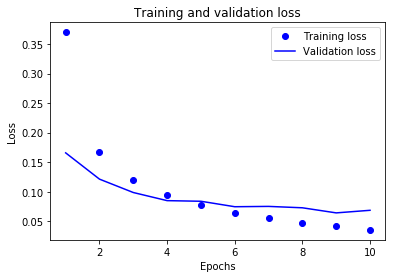

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 构建一个新的模型，该模型具有dropout、正则化或者BN

In [14]:
# 构建新模型
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(0.001),input_shape=(28*28, )))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(10, activation= 'softmax'))

from keras import optimizers
model.compile(optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 开始训练
batch_size = 128
epochs = 30
history = model.fit(train_images_part, train_labels_part, batch_size = batch_size, epochs=epochs, validation_data=(val_x, val_y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 59us/step - loss: 0.5921 - acc: 0.9065 - val_loss: 0.3605 - val_acc: 0.9577
Epoch 2/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.3263 - acc: 0.9559 - val_loss: 0.2814 - val_acc: 0.9663
Epoch 3/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.2629 - acc: 0.9661 - val_loss: 0.2372 - val_acc: 0.9717
Epoch 4/30
50000/50000 [==============================] - 2s 43us/step - loss: 0.2279 - acc: 0.9709 - val_loss: 0.2177 - val_acc: 0.9718
Epoch 5/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.2083 - acc: 0.9736 - val_loss: 0.2231 - val_acc: 0.9678
Epoch 6/30
50000/50000 [==============================] - 2s 46us/step - loss: 0.1944 - acc: 0.9752 - val_loss: 0.1903 - val_acc: 0.9751
Epoch 7/30
50000/50000 [==============================] - 2s 43us/step - loss: 0.1873 - acc: 0.9746 - val_loss: 0.1951 - val_acc

In [16]:
test_loss, test_acc = model.evaluate(test_images_part, test_labels_part)
print('test_loss:{}, test_acc:{}'.format(test_loss, test_acc))

10000/10000 [==============================] - 0s 49us/step
test_loss:0.13871247322559357, test_acc:0.9769


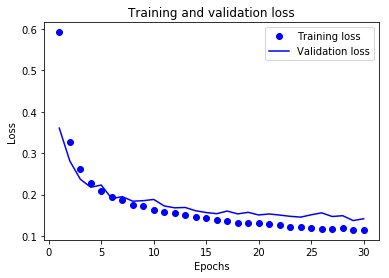

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()